In [1]:
import nltk
import pandas as pd
import re


In [2]:
messages=[line.rstrip() for line in open(r"SMSSpamCollection")]

In [3]:
print(len(messages))

5574


In [5]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
import matplotlib.pyplot as plt
import seaborn as sn

<Axes: ylabel='Frequency'>

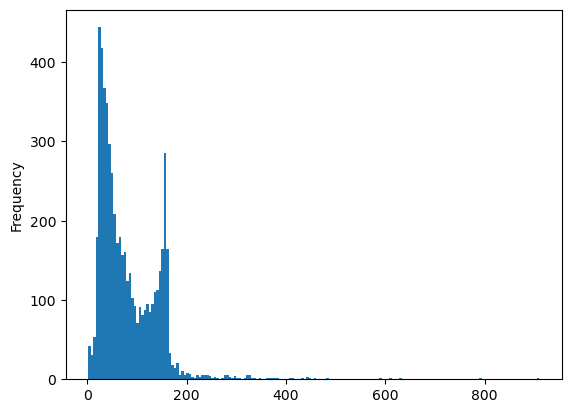

In [8]:
messages['length'] = messages['message'].apply(len)
messages["length"].plot.hist(bins=180)

In [9]:
messages[messages["length"]==910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

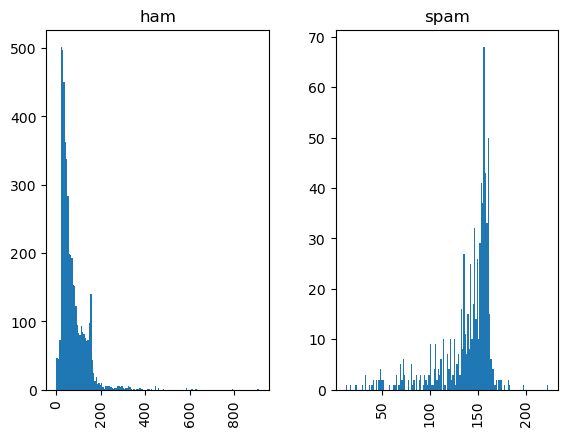

In [10]:
messages.hist(column="length",by="label",bins=150)

In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [12]:
ps=PorterStemmer()
corpus=[]

In [13]:
for i in range(0,len(messages)):
    review=re.sub("[^a-zA-Z]"," ",messages["message"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words("english")]
    review=" ".join(review)
    corpus.append(review)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [15]:
y=pd.get_dummies(messages["label"])
y=y.iloc[:,1].values


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [18]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(X_train,y_train)

In [19]:
y_pred=spam_detect_model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1597
           1       0.90      0.95      0.93       242

    accuracy                           0.98      1839
   macro avg       0.95      0.97      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.9804241435562806


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
spam_detect_model2=RandomForestClassifier().fit(X_train,y_train)
y_pred2=spam_detect_model2.predict(X_test)

In [25]:
print (classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1597
           1       1.00      0.82      0.90       242

    accuracy                           0.98      1839
   macro avg       0.99      0.91      0.94      1839
weighted avg       0.98      0.98      0.98      1839



In [26]:
accuracy2=accuracy_score(y_test, y_pred2)
print(accuracy2)

0.9760739532354541


In [87]:
#Naive_Bayes Classification is better working here